In [118]:
from fredapi import Fred
import datetime
import json
import os

In [119]:
import pandas as pd
pd.options.display.max_colwidth = 60

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(20, 10)

In [121]:
import hvplot.pandas
import panel as pn
import panel.widgets as pnw
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')

### Retrieve API Key - Prefer by env variables; else Brute Force

In [122]:
# Extract API keys from environment variables
FRED_API_KEY = os.getenv('FRED_API_KEY')
print(FRED_API_KEY)

None


In [123]:
# Extract API keys from environment variables
FRED_API_KEY = '51a3310fe6b34313e98eac05fcf2f0da'
print(FRED_API_KEY)

51a3310fe6b34313e98eac05fcf2f0da


In [124]:
fred = Fred(api_key='51a3310fe6b34313e98eac05fcf2f0da')

### Get Data and do some graphs

In [125]:
data1 = fred.get_series('SP500')

In [126]:
data1.head()

2010-04-30    1186.69
2010-05-03    1202.26
2010-05-04    1173.60
2010-05-05    1165.90
2010-05-06    1128.15
dtype: float64

In [127]:
data2 = fred.get_series('GDP')

In [128]:
data2.head()

1946-01-01        NaN
1946-04-01        NaN
1946-07-01        NaN
1946-10-01        NaN
1947-01-01    243.164
dtype: float64

In [129]:
s = fred.get_series('SP500', observation_start='2014-09-02', observation_end='2014-09-05')
s.tail()

2014-09-02    2002.28
2014-09-03    2000.72
2014-09-04    1997.65
2014-09-05    2007.71
dtype: float64

In [130]:
info = fred.get_series_info('PAYEMS')
info['title']

'All Employees, Total Nonfarm'

In [131]:
personal_income_series = fred.search_by_release(175, limit=5, order_by='popularity', sort_order='desc')
personal_income_series['title']

series id
SEAT653PCPI    Per Capita Personal Income in Seattle-Tacoma-Bellevue, W...
PCPI06037             Per Capita Personal Income in Los Angeles County, CA
CHIC917PCPI    Per Capita Personal Income in Chicago-Naperville-Elgin, ...
PCPI36061                Per Capita Personal Income in New York County, NY
LASV832PCPI    Per Capita Personal Income in Las Vegas-Henderson-Paradi...
Name: title, dtype: object

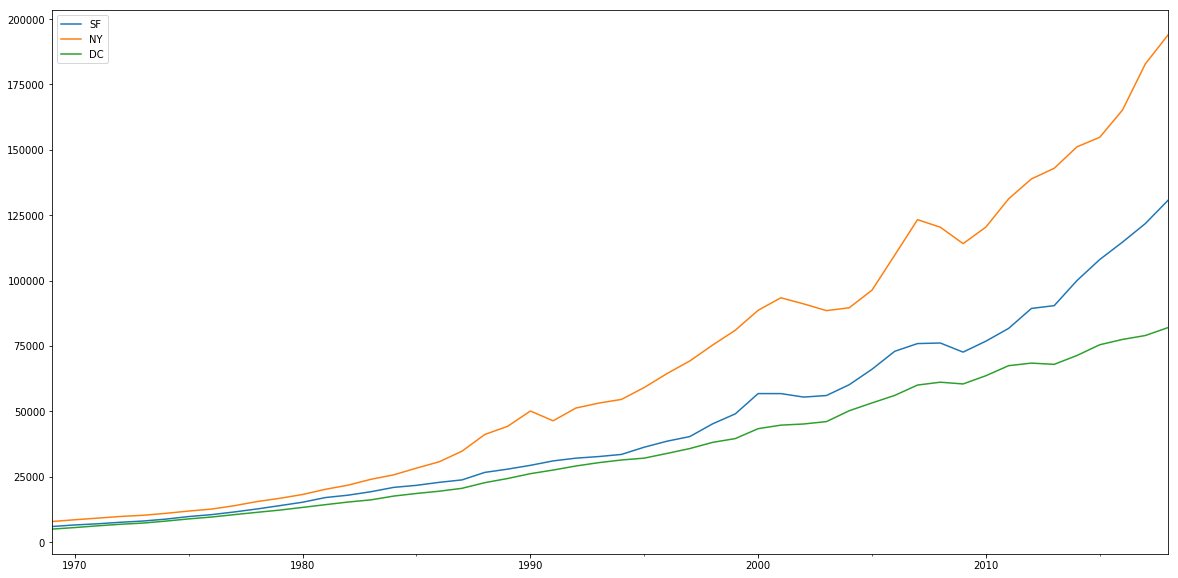

In [132]:
df = {}
df['SF'] = fred.get_series('PCPI06075')
df['NY'] = fred.get_series('PCPI36061')
df['DC'] = fred.get_series('PCPI11001')
df = pd.DataFrame(df)
df.plot()

In [133]:
df = fred.search_by_category(101, limit=10, order_by='popularity', sort_order='desc')
df['title']

series id
SLOAS                         Student Loans Owned and Securitized, Outstanding
TOTALSL               Total Consumer Credit Owned and Securitized, Outstanding
TERMCBAUTO48NS     Finance Rate on Consumer Installment Loans at Commercial...
TERMCBCCALLNS      Commercial Bank Interest Rate on Credit Card Plans, All ...
MVLOAS                  Motor Vehicle Loans Owned and Securitized, Outstanding
TERMCBPER24NS      Finance Rate on Personal Loans at Commercial Banks, 24 M...
REVOLSL              Total Revolving Credit Owned and Securitized, Outstanding
RIFLPBCIANM60NM    Finance Rate on Consumer Installment Loans at Commercial...
TERMCBCCINTNS      Commercial Bank Interest Rate on Credit Card Plans, Acco...
TERMAFCNCNSA       New Car Average Finance Rate at Auto Finance Companies (...
Name: title, dtype: object

In [134]:
df = fred.search_by_release(151)
df['title'].head(10)

series id
AKPCPI                              Per Capita Personal Income in Alaska
ALPCPI                             Per Capita Personal Income in Alabama
ARPCPI                            Per Capita Personal Income in Arkansas
AZPCPI                             Per Capita Personal Income in Arizona
BEAFWPCPI          Per Capita Personal Income in the Far West BEA Region
BEAGLPCPI       Per Capita Personal Income in the Great Lakes BEA Region
BEAMEPCPI           Per Capita Personal Income in the Mideast BEA Region
BEANEPCPI       Per Capita Personal Income in the New England BEA Region
BEAPLPCPI            Per Capita Personal Income in the Plains BEA Region
BEARMPCPI    Per Capita Personal Income in the Rocky Mountain BEA Region
Name: title, dtype: object

In [135]:
state_df = df[~df['title'].str.startswith('Per Capita Personal Income in the')]

In [136]:
len(state_df)

50

In [137]:
state_df.id.str[:2]

series id
AKPCPI    AK
ALPCPI    AL
ARPCPI    AR
AZPCPI    AZ
CAPCPI    CA
COPCPI    CO
CTPCPI    CT
DEPCPI    DE
FLPCPI    FL
GAPCPI    GA
HIPCPI    HI
IAPCPI    IA
IDPCPI    ID
ILPCPI    IL
INPCPI    IN
KSPCPI    KS
KYPCPI    KY
LAPCPI    LA
MAPCPI    MA
MDPCPI    MD
MEPCPI    ME
MIPCPI    MI
MNPCPI    MN
MOPCPI    MO
MSPCPI    MS
MTPCPI    MT
NCPCPI    NC
NDPCPI    ND
NEPCPI    NE
NHPCPI    NH
NJPCPI    NJ
NMPCPI    NM
NVPCPI    NV
NYPCPI    NY
OHPCPI    OH
OKPCPI    OK
ORPCPI    OR
PAPCPI    PA
RIPCPI    RI
SCPCPI    SC
SDPCPI    SD
TNPCPI    TN
TXPCPI    TX
UTPCPI    UT
VAPCPI    VA
VTPCPI    VT
WAPCPI    WA
WIPCPI    WI
WVPCPI    WV
WYPCPI    WY
Name: id, dtype: object

In [138]:
income_by_state = {}
for series_id in state_df.index:
    income_by_state[series_id[:2]] = fred.get_series(series_id)

In [139]:
income_by_state = pd.DataFrame(income_by_state)

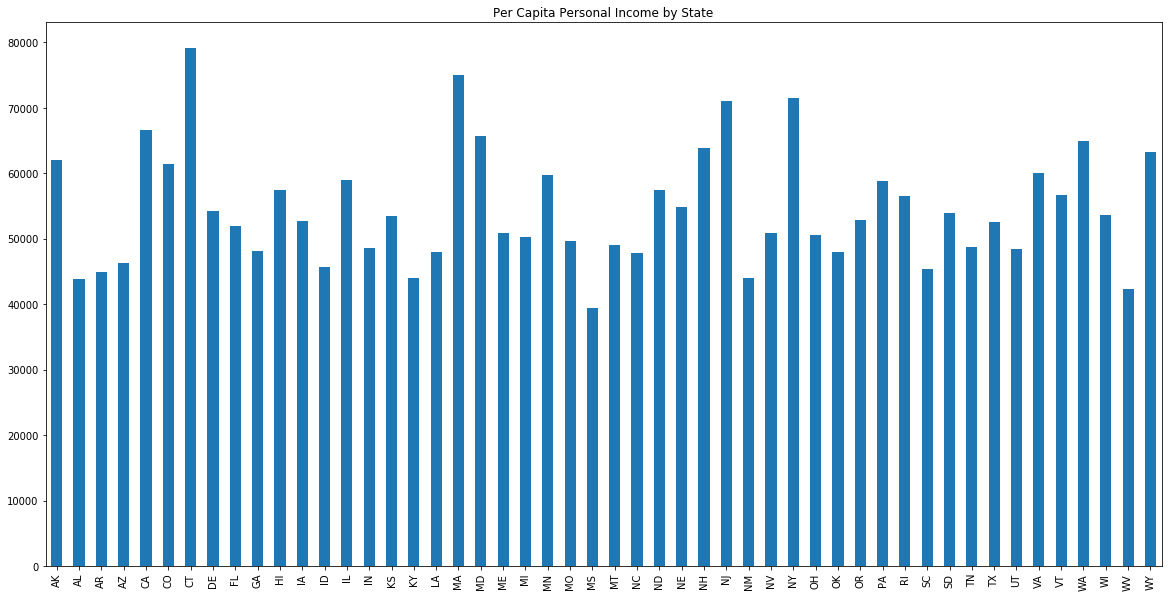

In [140]:
income_by_state.iloc[-1].plot(kind='bar', title = 'Per Capita Personal Income by State')

In [141]:
# GDP
gdp = fred.get_series('GDP')
gdp.head()

1946-01-01        NaN
1946-04-01        NaN
1946-07-01        NaN
1946-10-01        NaN
1947-01-01    243.164
dtype: float64

In [142]:
# GDP REAL
gdp_real = fred.get_series('GDPC1')
gdp_real.head()

1947-01-01    2033.061
1947-04-01    2027.639
1947-07-01    2023.452
1947-10-01    2055.103
1948-01-01    2086.017
dtype: float64

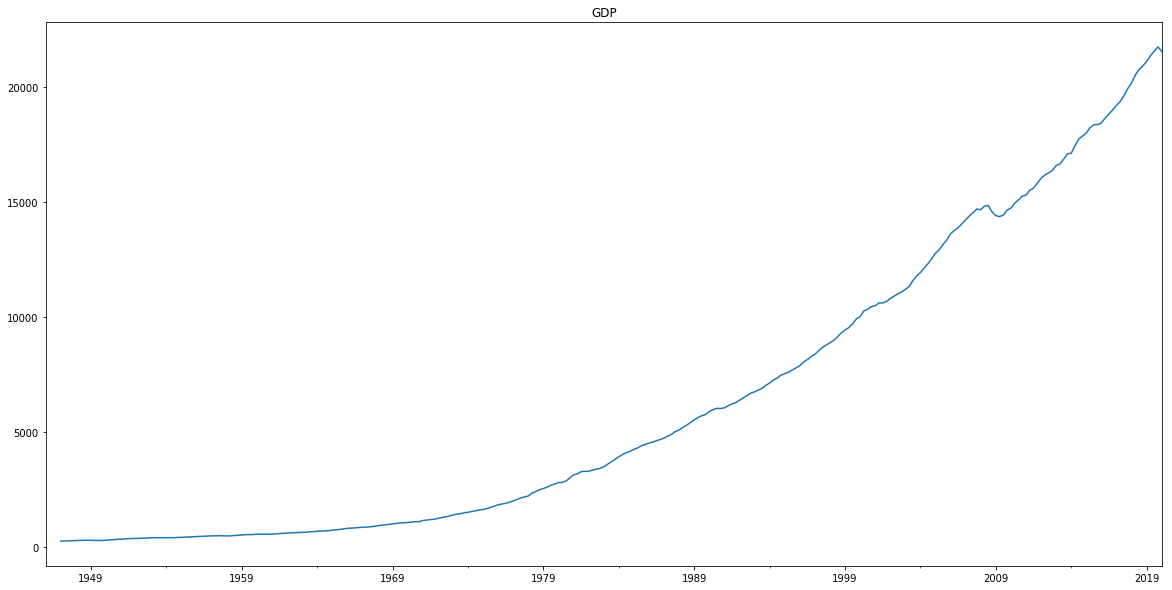

In [143]:
gdp.plot(title = "GDP")

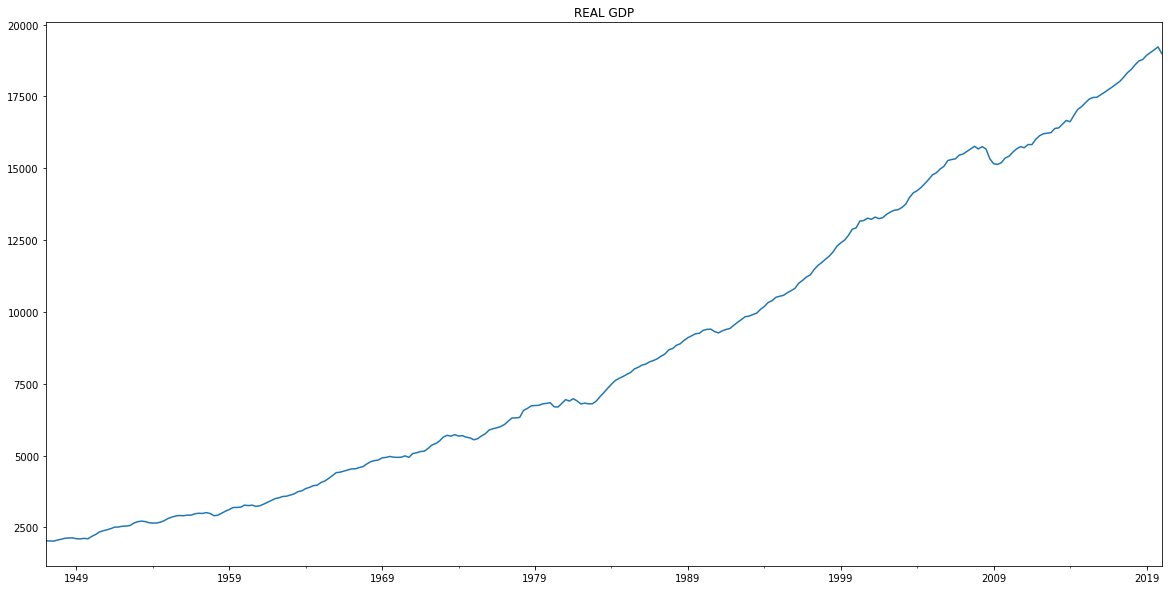

In [144]:
gdp_real.plot(title = "REAL GDP")

In [145]:
# REAL MEDIAN HOUSEHOLD INCOME
HouseHold_Income_Median = fred.get_series('MEHOINUSA672N')
HouseHold_Income_Median.tail()

2014-01-01    56969.0
2015-01-01    59901.0
2016-01-01    61779.0
2017-01-01    62626.0
2018-01-01    63179.0
dtype: float64

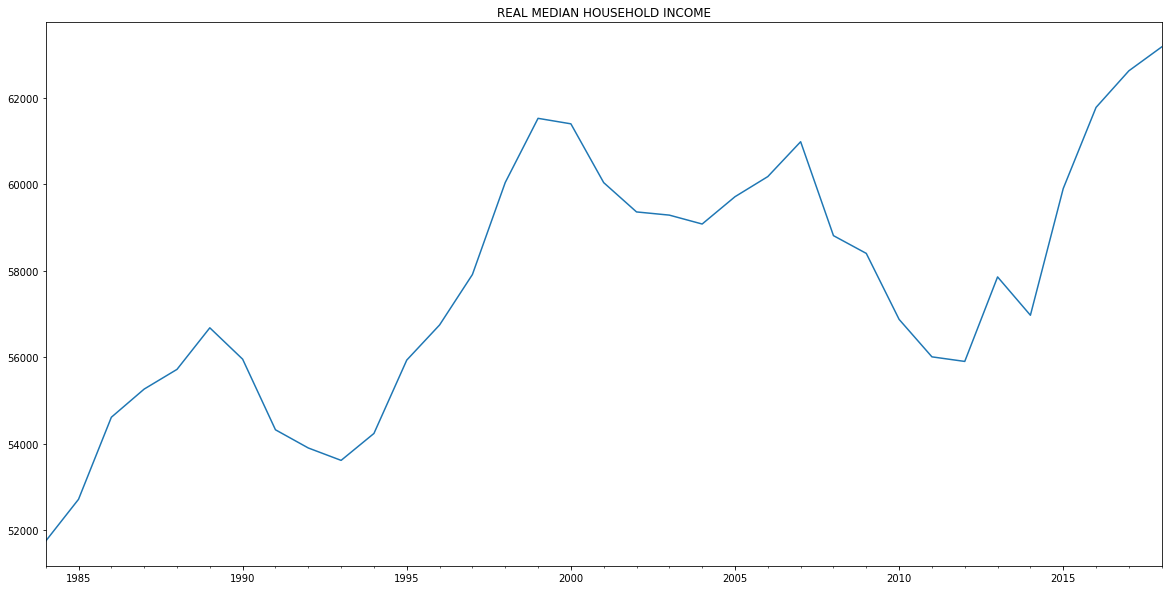

In [146]:
HouseHold_Income_Median.plot(title = "REAL MEDIAN HOUSEHOLD INCOME")

In [147]:
# Real gross domestic product per capita
gdp_real_percapita = fred.get_series('A939RX0Q048SBEA')
gdp_real_percapita.tail()

2019-01-01    57719.0
2019-04-01    57946.0
2019-07-01    58167.0
2019-10-01    58392.0
2020-01-01    57621.0
dtype: float64

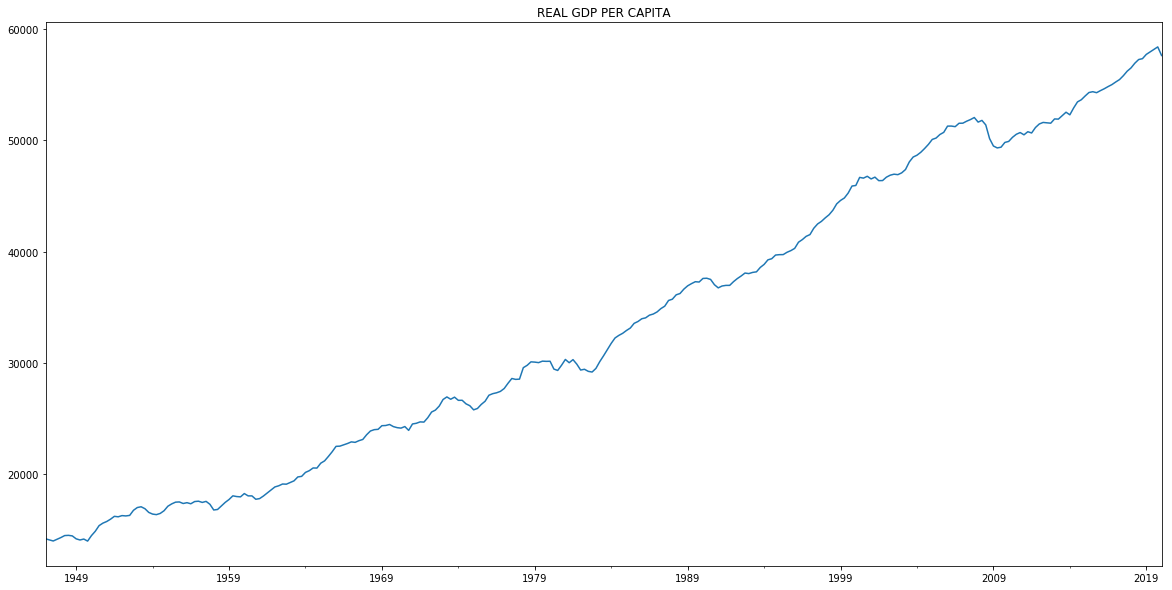

In [148]:
gdp_real_percapita.plot(title = "REAL GDP PER CAPITA")

In [149]:
# Real gross domestic product per capita
personal_saving_rate = fred.get_series('PSAVERT')
personal_saving_rate.tail()

2019-11-01     7.7
2019-12-01     7.5
2020-01-01     7.7
2020-02-01     8.0
2020-03-01    13.1
dtype: float64

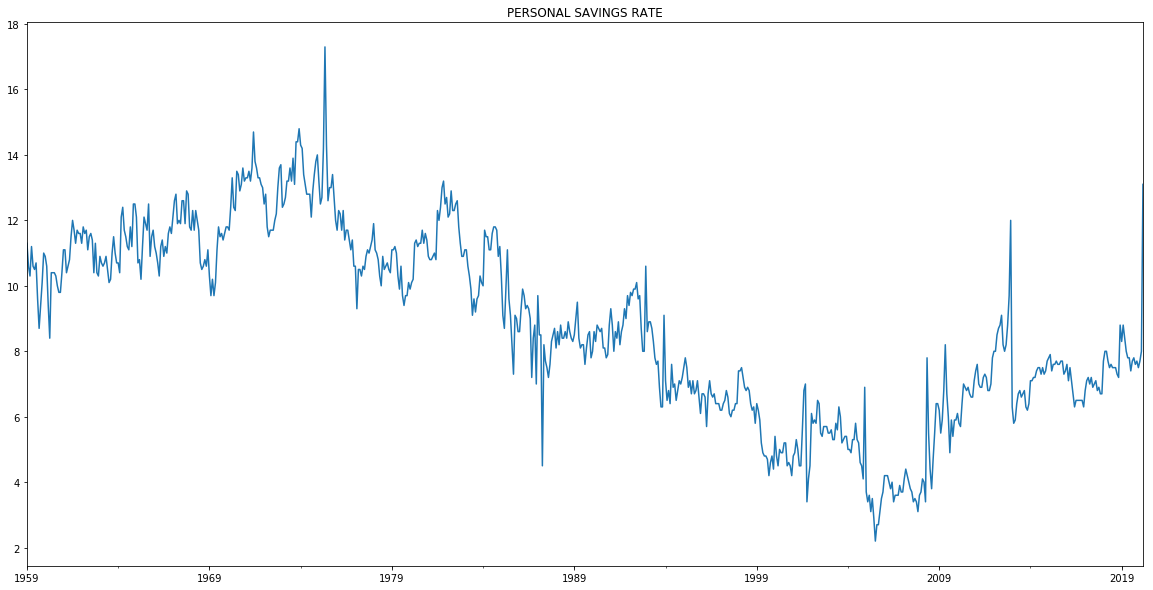

In [150]:
personal_saving_rate.plot(title = "PERSONAL SAVINGS RATE")

# Some Interactive Plots

In [151]:
gdp.head()

1946-01-01        NaN
1946-04-01        NaN
1946-07-01        NaN
1946-10-01        NaN
1947-01-01    243.164
dtype: float64

In [152]:
# GDP 

gdp.hvplot(kind = "line", title = "GDP", ylabel = "GDP")

:Curve   [index]   (0)

In [153]:
# Real GDP

gdp_real.hvplot(kind = "line", ylabel = "REAL GDP")

:Curve   [index]   (0)

In [154]:
# Real GDP PER CAPITA

gdp_real_percapita.hvplot(kind = "line", ylabel = "REAL GDP PER CAPITA")

:Curve   [index]   (0)

In [155]:
# Personal Savings Rate

personal_saving_rate.hvplot(kind = "line", ylabel = "PERSONAL SAVING RATE")

:Curve   [index]   (0)

In [156]:
# Search for available data in FRED

fred.search('savings').T

series id,PSAVERT,SAVINGS,WSAVNS,GPSAVE,GGSAVE,A072RC1Q156SBEA,A126RC1A027NBEA,A072RC1A156NBEA,A927RC1A027NBEA,BKFTTLA641N,...,BOGZ1FU363030005Q,BOGZ1FU313161400Q,BOGZ1FU836006005A,BOGZ1FU836006005Q,BOGZ1FL783030205A,BOGZ1FU176007005A,BOGZ1FU176007005Q,BOGZ1FU736006400Q,BOGZ1FA796012005A,BOGZ1FU796012005A
frequency,Monthly,"Weekly, Ending Monday","Weekly, Ending Monday",Quarterly,Quarterly,Quarterly,Annual,Annual,Annual,Annual,...,Quarterly,Quarterly,Annual,Quarterly,Annual,Annual,Quarterly,Quarterly,Annual,Annual
frequency_short,M,W,W,Q,Q,Q,A,A,A,A,...,Q,Q,A,Q,A,A,Q,Q,A,A
id,PSAVERT,SAVINGS,WSAVNS,GPSAVE,GGSAVE,A072RC1Q156SBEA,A126RC1A027NBEA,A072RC1A156NBEA,A927RC1A027NBEA,BKFTTLA641N,...,BOGZ1FU363030005Q,BOGZ1FU313161400Q,BOGZ1FU836006005A,BOGZ1FU836006005Q,BOGZ1FL783030205A,BOGZ1FU176007005A,BOGZ1FU176007005Q,BOGZ1FU736006400Q,BOGZ1FA796012005A,BOGZ1FU796012005A
last_updated,2020-04-30 07:50:16-05:00,2020-04-30 15:39:28-05:00,2020-04-30 15:39:50-05:00,2020-03-26 08:10:22-05:00,2020-03-26 08:10:24-05:00,2020-04-29 08:03:05-05:00,2020-03-26 08:10:48-05:00,2020-02-27 08:03:18-06:00,2020-03-26 08:10:53-05:00,2020-02-21 15:43:02-06:00,...,2020-03-17 13:45:30-05:00,2020-03-12 12:25:30-05:00,2020-03-12 12:25:27-05:00,2020-03-12 12:29:06-05:00,2020-03-12 12:28:34-05:00,2020-03-12 12:25:45-05:00,2020-03-17 13:45:53-05:00,2020-03-17 12:48:39-05:00,2020-03-12 12:26:21-05:00,2020-03-12 12:26:42-05:00
notes,BEA Account Code: A072RC Personal saving as a percentage...,The savings deposits component of M2 consists of passboo...,The savings deposits component of M2 consists of passboo...,BEA Account Code: A126RC A Guide to the National Income...,BEA Account Code: A927RC,BEA Account Code: A072RC For more information about thi...,BEA Account Code: A126RC For more information about thi...,BEA Account Code: A072RC For more information about thi...,BEA Account Code: A927RC For more information about thi...,Transaction Types Institutions have been resolved throug...,...,Source ID: FU363030005.Q For more information about the...,Source ID: FU313161400.Q For more information about the...,Source ID: FU836006005.A For more information about the...,Source ID: FU836006005.Q For more information about the...,Source ID: FL783030205.A For more information about the...,Source ID: FU176007005.A For more information about the...,Source ID: FU176007005.Q For more information about the...,Source ID: FU736006400.Q For more information about the...,Source ID: FA796012005.A For more information about the...,Source ID: FU796012005.A For more information about the...
observation_end,2020-03-01 00:00:00,2020-04-20 00:00:00,2020-04-20 00:00:00,2019-10-01 00:00:00,2019-10-01 00:00:00,2020-01-01 00:00:00,2019-01-01 00:00:00,2019-01-01 00:00:00,2019-01-01 00:00:00,2020-01-01 00:00:00,...,2019-10-01 00:00:00,2019-10-01 00:00:00,2019-01-01 00:00:00,2019-10-01 00:00:00,2019-01-01 00:00:00,2019-01-01 00:00:00,2019-10-01 00:00:00,2019-10-01 00:00:00,2019-01-01 00:00:00,2019-01-01 00:00:00
observation_start,1959-01-01 00:00:00,1975-01-06 00:00:00,1975-01-06 00:00:00,1947-01-01 00:00:00,1947-01-01 00:00:00,1947-01-01 00:00:00,1929-01-01 00:00:00,1929-01-01 00:00:00,1929-01-01 00:00:00,1934-01-01 00:00:00,...,1946-10-01 00:00:00,1946-10-01 00:00:00,1946-01-01 00:00:00,1946-10-01 00:00:00,1945-01-01 00:00:00,1946-01-01 00:00:00,1946-10-01 00:00:00,1946-10-01 00:00:00,1946-01-01 00:00:00,1946-01-01 00:00:00
popularity,79,63,45,53,53,50,19,29,6,37,...,0,0,0,0,0,0,0,0,0,0
realtime_end,2020-04-30 00:00:00,2020-04-30 00:00:00,2020-04-30 00:00:00,2020-04-30 00:00:00,2020-04-30 00:00:00,2020-04-30 00:00:00,2020-04-30 00:00:00,2020-04-30 00:00:00,2020-04-30 00:00:00,2020-04-30 00:00:00,...,2020-04-30 00:00:00,2020-04-30 00:00:00,2020-04-30 00:00:00,2020-04-30 00:00:00,2020-04-30 00:00:00,2020-04-30 00:00:00,2020-04-30 00:00:00,2020-04-30 00:00:00,2020-04-30 00:00:00,2020-04-30 00:00:00
realtime_start,2020-04-30 00:00:00,2020-04-30 00:00:00,2020-04-30 00:00:00,2020-04-30 00:00:00,2020-